#                                       Lead Score Case Study

# Problem Statement:

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. A typical lead conversion process can be represented using the following funnel:

Lead Conversion Process - Demonstrated as a funnel As you can see, there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

**Data**

Data You have been provided with a leads dataset from the past with around 9000 data points. This dataset consists of various attributes such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc. which may or may not be useful in ultimately deciding whether a lead will be converted or not. The target variable, in this case, is the column ‘Converted’ which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted. You can learn more about the dataset from the data dictionary provided in the zip folder at the end of the page. Another thing that you also need to check out for are the levels present in the categorical variables. Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value (think why?).

**Goal**

Goals of the Case Study There are quite a few goals for this case study.

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted. There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

Lets import necessary items

In [2218]:
##importing warnings
import warnings
warnings.filterwarnings('ignore')

In [2219]:

import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
pd.set_option('display.max_columns',False)

# 1.Reading and Understanding the data

In [2220]:
##Reading and understanding the data
Le_df=pd.read_csv('C:\\Users\hegde\.jupyter\lab\workspaces\Leads.csv') # Reading leads dataframe as lead_df
Le_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [2221]:
##checking the data type 
Le_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [2222]:
# Get the summary of the dataframe using 'describe()'
Le_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [2223]:
##check the number of rows and columns
Le_df.shape

(9240, 37)

# 2. Data Cleaning

**When we see Leads file,we could see there are few select values which is a null values.Lets replace it with nan values**

In [2224]:
# Replacing Select values with nan values
Le_df = Le_df.replace('Select', np.nan)

In [2225]:
# Checking whether if there is any missing value.
round(100*(Le_df.isnull().sum()/len(Le_df.index)),2).sort_values(ascending = False)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Index                       45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

We can see there are lot of missing values 

In [2226]:
# Checking for duplicates values
Le_df.loc[Le_df.duplicated()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


**Dropping the columns**

In [2227]:
# Removing columns whch column containd more than 40% of Missing Values
cols=Le_df.columns[round((Le_df.isnull().sum()/len(Le_df))*100)>=40]
Le_df=Le_df.drop(cols,1)

In [2228]:
# Rechecking
round(100*(Le_df.isnull().sum()/len(Le_df.index)),2).sort_values(ascending = False)

Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Update me on Supply Chain Content                 0.00
Get updates on DM Content                         0.00
X Education Forums                                0.00
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
Receive More Updates About Our Courses            0.00
Through Recommendations                           0.00
Digital Advertisement                             0.00
Newspaper                                         0.00
Prospect I

We can see that columns having highest missing values are dropped

In [2229]:
# dropping 'Tags' as it is assigned to customers by sales team indicating the current status of the lead.
Le_df.drop('Tags',1,inplace=True)

In [2230]:
# Finding the Labels contains in the Country Variable
Le_df['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [2231]:
# imputing  "India" as its common occurance in Country Column
Le_df['Country']=Le_df['Country'].replace(np.nan,'India')

In [2232]:
##lets check
Le_df['Country'].value_counts()

India                   8953
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [2233]:
# Finding the Labels contains in the Specialization Variable
Le_df['Specialization'].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

In [2234]:
# Imputing  "Finance Management" as its common occurance in Specialization Column
Le_df['Specialization']=Le_df['Specialization'].replace(np.nan,'Finance Management')

In [2235]:
##lets recheck
Le_df['Specialization'].value_counts()

Finance Management                   4356
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [2236]:
# Finding the Labels contains in the "What is your current occupation" Variable
Le_df['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [2237]:
# Imputing  "Unemployed" as its common occurance in What is your current occupation Column
Le_df['What is your current occupation']=Le_df['What is your current occupation'].replace(np.nan,'Unemployed')

In [2238]:
##Recheck
Le_df['What is your current occupation'].value_counts()

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [2239]:
# Finding the Labels contains in the "What matters most to you in choosing a course" Variable
Le_df['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [2240]:
# Dropping "What matters most to you in choosing a course" as we have almost same value for colums
Le_df.drop('What matters most to you in choosing a course',1,inplace=True)

In [2241]:
# Finding the Labels contains in the "Last Activity Variable
Le_df['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [2242]:
# Imputing "Email Opened" as its common occurance in Last Activity Column
Le_df['Last Activity']=Le_df['Last Activity'].fillna('Email Opened')

In [2243]:
##lets crosscheck
Le_df['Last Activity'].value_counts()

Email Opened                    3540
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [2244]:
# Finding the Labels contains in the "Last Activity Variable
Le_df['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [2245]:

# imputing  "Google" as its common occurance in Lead Source Column
Le_df['Lead Source']=Le_df['Lead Source'].replace(np.nan,'Google')

In [2246]:
##Rechecking the values
Le_df['Lead Source'].value_counts()

Google               2904
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

**We can see there are 2 googles hence lets replace one google with Google**

In [2247]:
Le_df['Lead Source']=Le_df['Lead Source'].replace('google','Google')

In [2248]:
##Lets crosscheck
Le_df['Lead Source'].value_counts()

Google               2909
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
Pay per Click Ads       1
blog                    1
WeLearn                 1
welearnblog_Home        1
youtubechannel          1
testone                 1
NC_EDM                  1
Name: Lead Source, dtype: int64

We can see google has been replaced

In [2249]:
Le_df['Total Time Spent on Website'].describe()

count    9240.000000
mean      487.698268
std       548.021466
min         0.000000
25%        12.000000
50%       248.000000
75%       936.000000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

**Checking for Outliers**

By referring Leads and leads data dictionary we know that below mentioned 3 columns has to be checked for outliers

1.TotalVisits

2.Page Views Per Visit

3.Total Time Spent on Website

<AxesSubplot:xlabel='TotalVisits'>

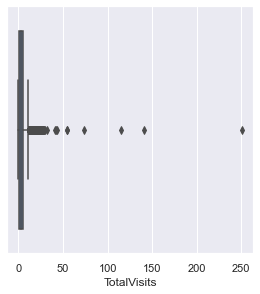

In [2250]:
##checking for total visits
plt.figure(figsize = (15,10))
plt.subplot(2,3,1)
sns.boxplot(Le_df['TotalVisits'])

We can see Outliers which has to be treated

<AxesSubplot:xlabel='Page Views Per Visit'>

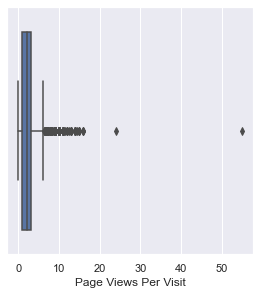

In [2251]:
##checking for Page Views Per Visit
plt.figure(figsize = (15,10))
plt.subplot(2,3,1)
sns.boxplot(Le_df['Page Views Per Visit'])


We can see Outliers which has to be treated

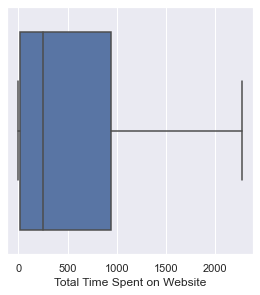

In [2252]:
##checking for Total Time Spent on Website
plt.figure(figsize = (15,10))
plt.subplot(2,3,3)
sns.boxplot(Le_df['Total Time Spent on Website'])
plt.xlabel('Total Time Spent on Website')
plt.show()

we can see high median in Total Time Spent on Website and there are no outliers

**Imputing median as it is a continuous variables to remove outliers **

In [2253]:
Le_df['TotalVisits']=Le_df['TotalVisits'].fillna(Le_df['TotalVisits'].median())
Le_df['Page Views Per Visit']=Le_df['Page Views Per Visit'].fillna(Le_df['Page Views Per Visit'].median())

In [2254]:
Le_df[pd.isnull(Le_df).any(axis=1)==True]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


**Checking for null values**

In [2255]:
round(100*(Le_df.isnull().sum()/len(Le_df)),2)

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Country                                     0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                 

We have almost cleaned data

In [2256]:
##lets see our data
Le_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,India,Finance Management,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Finance Management,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,No,No,No,No,No,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Finance Management,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Modified


We can make a Lead number as our index

In [2257]:
# making lead number as index
Le_df=Le_df.set_index('Lead Number')

In [2258]:
##lets see our data
Le_df.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
Lead Number,,,,,,,,,,,,,,,,,,,,,,,,,,
660737,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,India,Finance Management,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Modified
660728,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Finance Management,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Email Opened
660727,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,No,No,No,No,No,No,No,No,No,No,No,Yes,Email Opened
660719,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Modified
660681,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Finance Management,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Modified


since lead number is also unique we couldnt see any importance in prospect id so lets drop it

In [2259]:
Le_df.drop(['Prospect ID'],1,inplace=True)

In [2260]:
Le_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
Lead Number,,,,,,,,,,,,,,,,,,,,,,,,,
660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,India,Finance Management,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Modified
660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Finance Management,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Email Opened
660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,No,No,No,No,No,No,No,No,No,No,No,Yes,Email Opened
660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Modified
660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Finance Management,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Modified


Now data looks good

**Checking for dtypes**

In [2261]:
Le_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9240 entries, 660737 to 579533
Data columns (total 25 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Lead Origin                               9240 non-null   object 
 1   Lead Source                               9240 non-null   object 
 2   Do Not Email                              9240 non-null   object 
 3   Do Not Call                               9240 non-null   object 
 4   Converted                                 9240 non-null   int64  
 5   TotalVisits                               9240 non-null   float64
 6   Total Time Spent on Website               9240 non-null   int64  
 7   Page Views Per Visit                      9240 non-null   float64
 8   Last Activity                             9240 non-null   object 
 9   Country                                   9240 non-null   object 
 10  Specialization               

In [2262]:
# Storing column with dtype object and column with dtype number in two different list, so we can easily Perform analysis 
col_obj=list(Le_df.loc[:, Le_df.dtypes == np.object].columns)
col_num=list(Le_df.loc[:, Le_df.dtypes == np.int64].columns)
col_num+=(list(Le_df.loc[:, Le_df.dtypes == np.number].columns))
print('columns with object dtype \n {} \n \n columns with number dtype \n {}'.format(col_obj,col_num))

columns with object dtype 
 ['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity', 'Country', 'Specialization', 'What is your current occupation', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity'] 
 
 columns with number dtype 
 ['Converted', 'Total Time Spent on Website', 'TotalVisits', 'Page Views Per Visit']


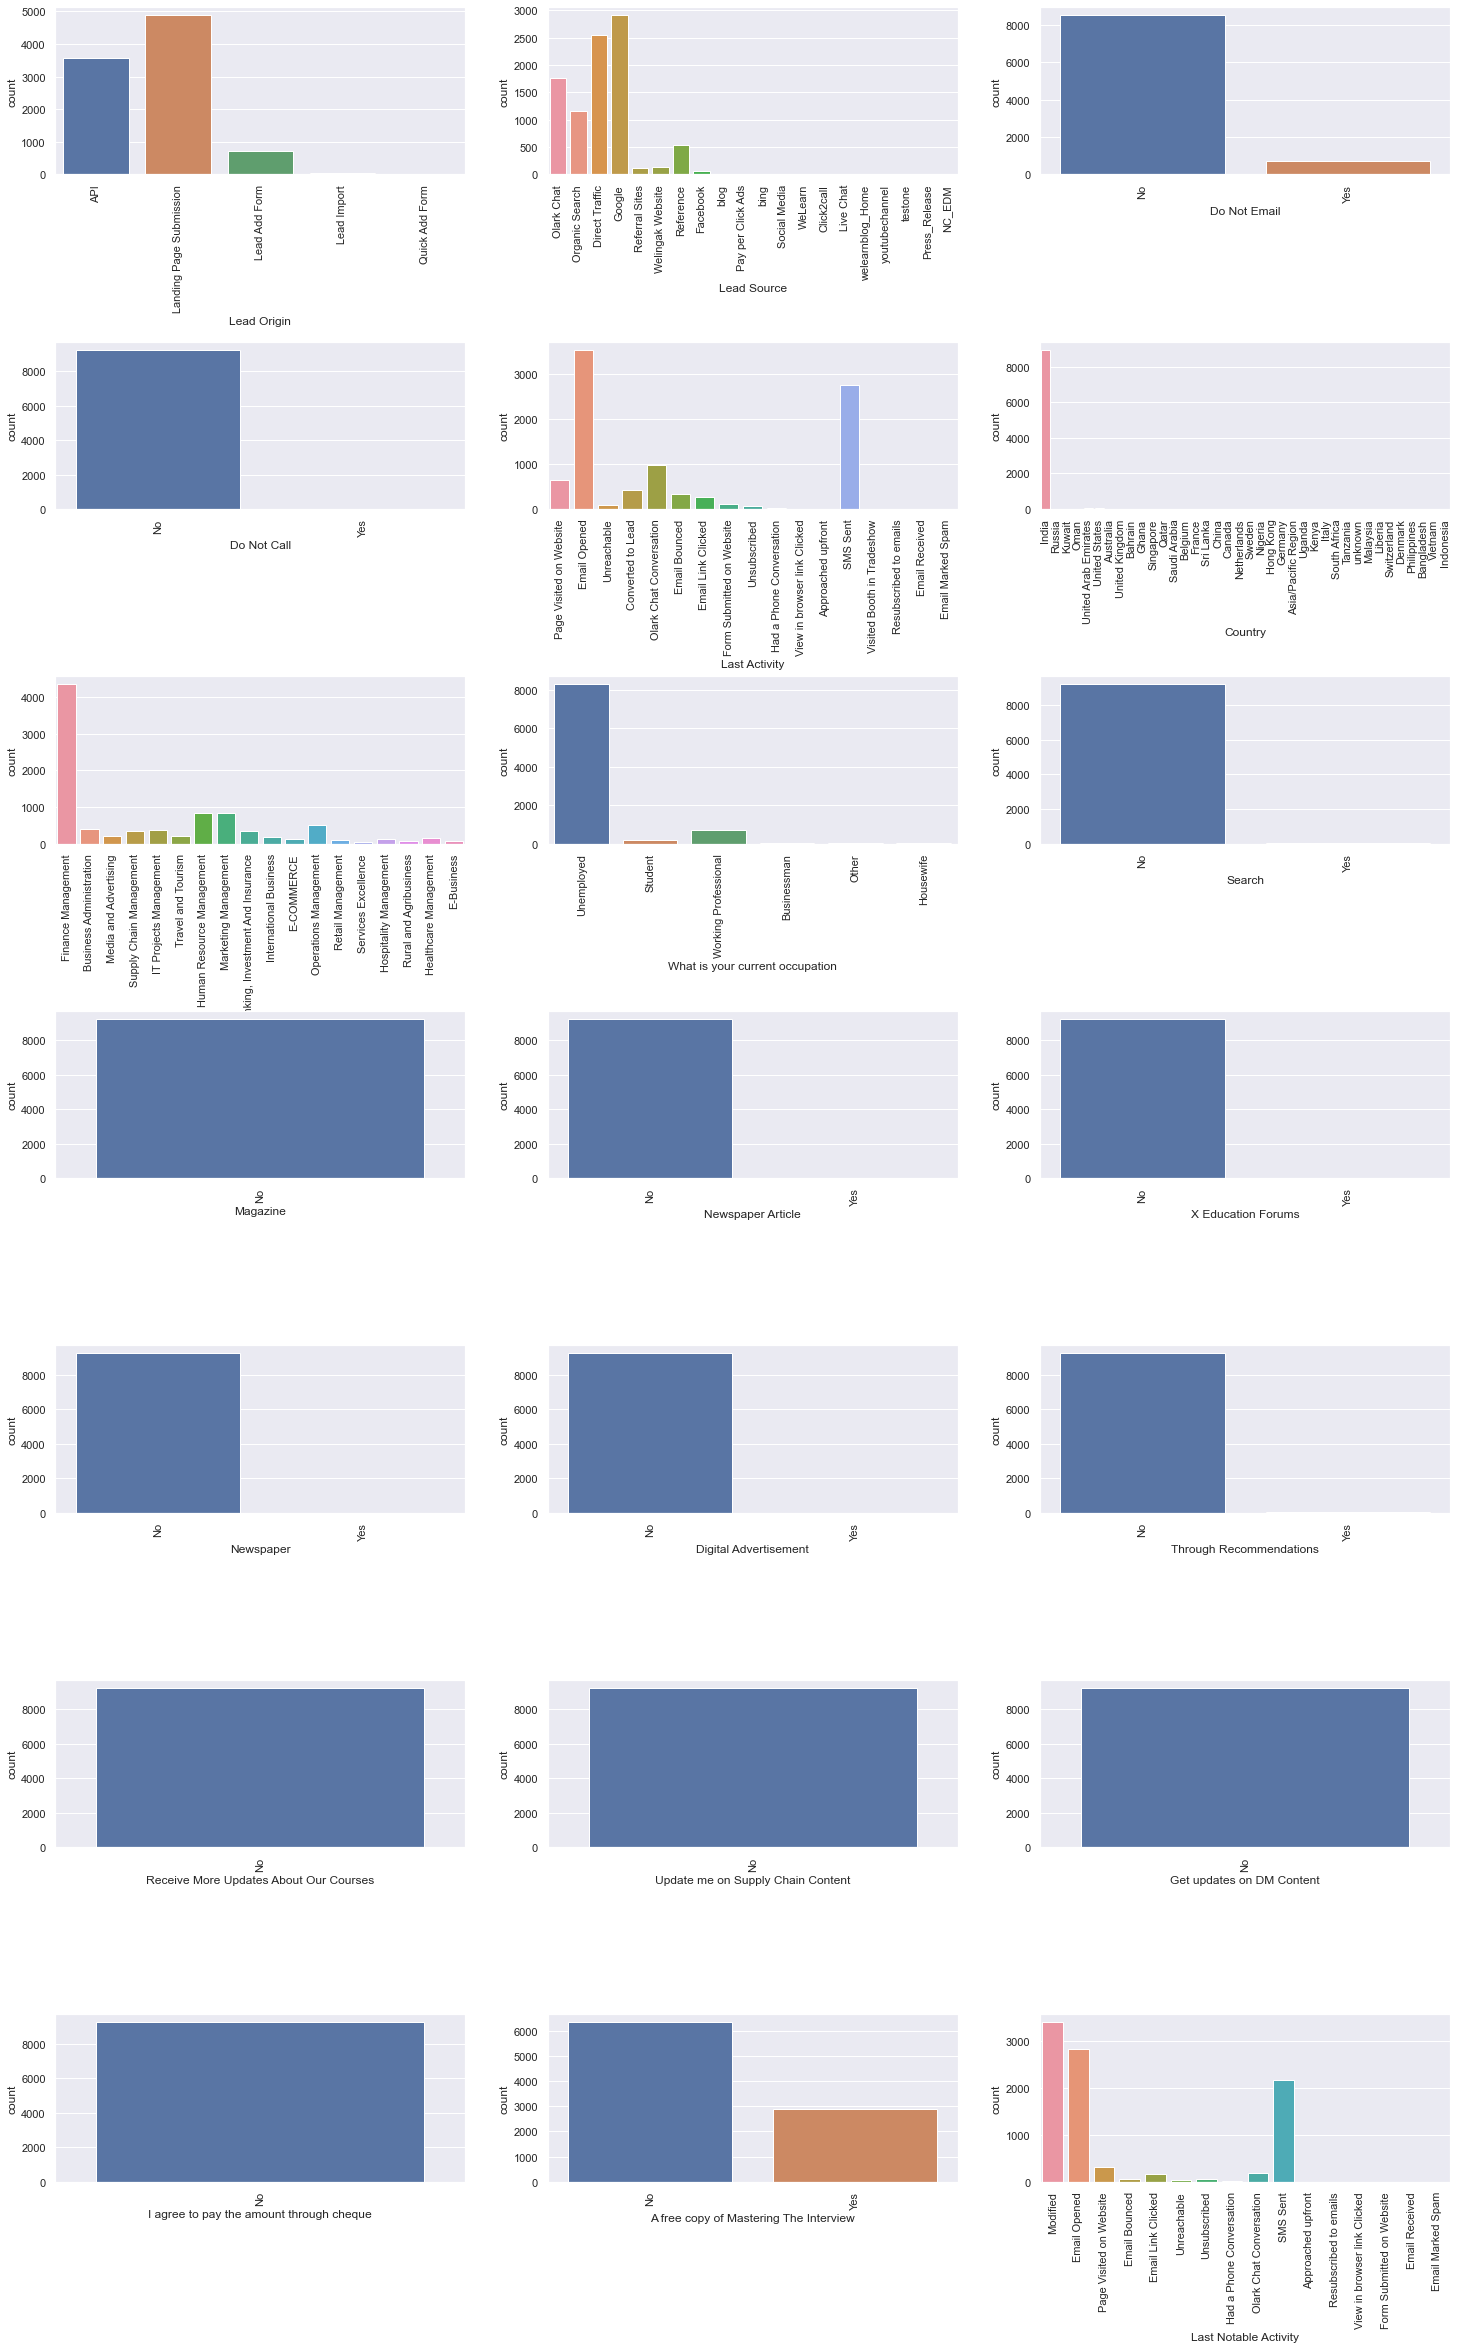

In [2263]:
##Lets plot a countplot to check the distribution
plt.figure(figsize=(25,40))
sns.set()
plt.subplots_adjust(wspace=.2,hspace=1 )
for i in enumerate(col_obj):
    plt.subplot(7,3, i[0]+1)
    sns.countplot(i[1],data=Le_df) 
    plt.xticks(rotation=90)
plt.show()

**Conclusion:**

1.we can see that there are many columns which are highly skewed or has only one value we can remove those columns


2.There are columns which has many categories we can add all extra columns and name it as other    
    

In [2264]:
# Taking care of highly skewed columns  and one value only
Le_df=Le_df.drop(['What is your current occupation','Do Not Call','Do Not Email','Country','Search',\
                      'X Education Forums','Newspaper','Newspaper Article','Through Recommendations','Digital Advertisement'],1)

In [2265]:
Le_df=Le_df.drop(['Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content',\
                      'Get updates on DM Content','I agree to pay the amount through cheque', ],1)

In [2266]:
col_obj=Le_df.loc[:, Le_df.dtypes == np.object].columns

In [2267]:
Le_df.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,A free copy of Mastering The Interview,Last Notable Activity
Lead Number,,,,,,,,,,
660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Finance Management,No,Modified
660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Finance Management,No,Email Opened
660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Yes,Email Opened
660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Media and Advertising,No,Modified
660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Finance Management,No,Modified


**Seggregating all columns to single label**

In [2268]:
# changing categories which are occured less than 1000
col_dict_ls=dict(Le_df['Lead Source'].value_counts()<1000)

# labels which are occured less like Reference,Reffereal site we can impute to 'Other'
for i in col_dict_ls.keys():
    if col_dict_ls[i]==True:
       Le_df['Lead Source']=Le_df['Lead Source'].replace(i,'Other')

In [2269]:
# Changing categories which are occured less than 300
col_dict_la=dict(Le_df['Last Activity'].value_counts()<300)
# labels which are occured less like Resubscribed to emails ,Visited Booth in Tradeshow...those are impute to 'Other'

for i in col_dict_la.keys():
    if col_dict_la[i]==True:
       Le_df['Last Activity']=Le_df['Last Activity'].replace(i,'Other')

In [2270]:
# Changing categories which are occured less than 500
col_dict_lna=dict(Le_df['Last Notable Activity'].value_counts()<500)
# labels which are occured less like Reference,Reffereal site we can impute to 'Other'

for i in col_dict_lna.keys():
    if col_dict_lna[i]==True:
       Le_df['Last Notable Activity']=Le_df['Last Notable Activity'].replace(i,'Other')

In [2271]:
# Changing categories which are occured less than 350
col_dict_spec=dict(Le_df['Specialization'].value_counts()<350)
# labels which are occured less like E-Business,Retail Management we can impute to 'Other'

for i in col_dict_spec.keys():
    if col_dict_spec[i]==True:
       Le_df['Specialization']=Le_df['Specialization'].replace(i,'Other')

# 3.Exploratory Data Analysis

**Univariate Analysis**

Lets create a column which is only for categorical variables

In [2272]:
cols=Le_df.loc[:, Le_df.dtypes == np.object].columns
cols

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

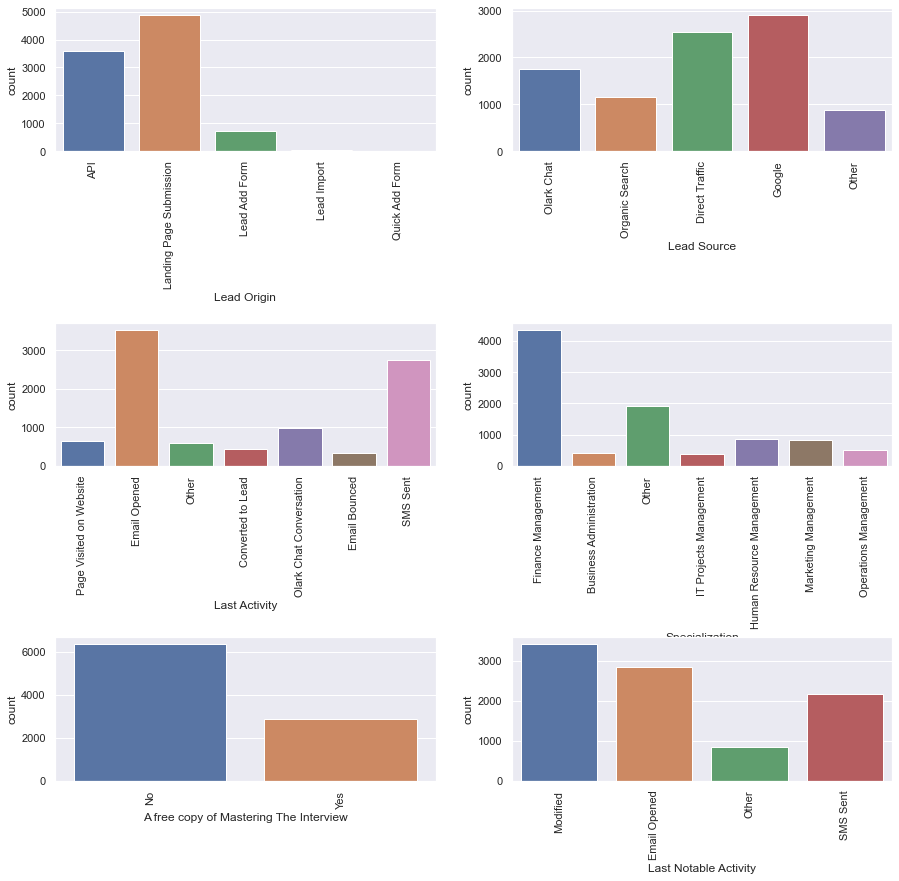

In [2084]:
plt.figure(figsize=(15,20))
sns.set()
plt.subplots_adjust(wspace=.2,hspace=1.2 )
for i in enumerate(col_obj):
    plt.subplot(4,2, i[0]+1)
    sns.countplot(i[1],data=Le_df)
    plt.xticks(rotation=90)
plt.show()


**Conclusion:**
  
  We can see that Land Page submission has high count
  
  Google source has highest count
  
  Email opened has highest count
  
  Finance Management has high count
  
    

**Univariate Analysis for continuous variables**

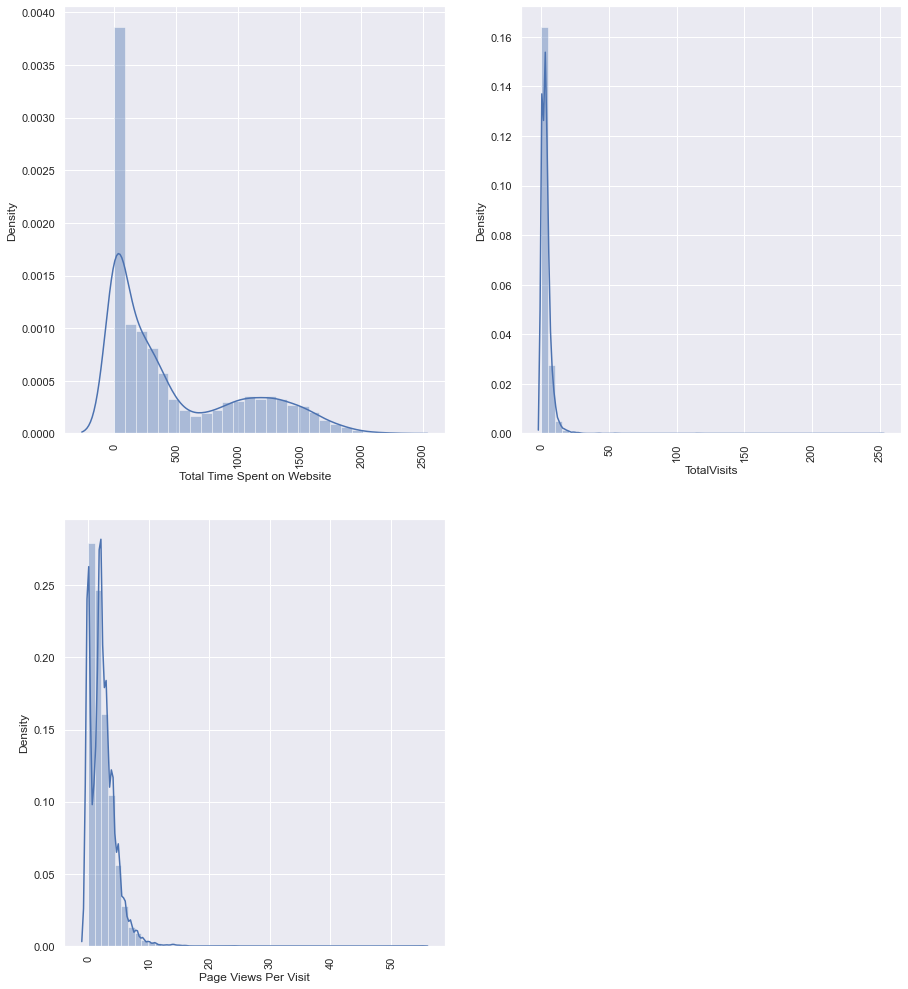

In [2273]:
col_num.remove('Converted')

plt.figure(figsize=(15,15))
plt.subplots_adjust(bottom=.01)
for i in enumerate(col_num):
    
    plt.subplot(2,2, i[0]+1)
    sns.distplot(Le_df[i[1]])
    
    plt.xticks(rotation=90)
plt.show()

**Conclusion:**
    
 1.Presence of Outliers in Total Visits and Page Views Per Visit
 
 2.None of the Continueous Variables are in Normal distribution

**Bivariate Analysis**

Lets perform Bivariate analysis with respect to target variable as converted

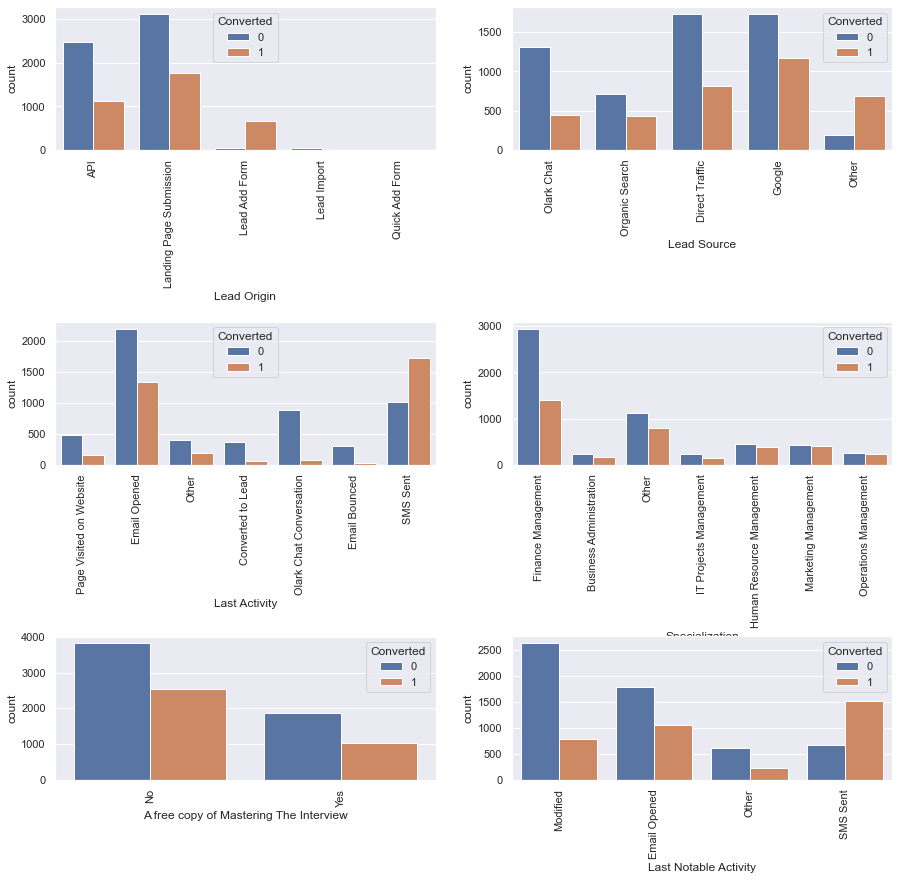

In [2274]:
plt.figure(figsize=(15,20))
plt.subplots_adjust(wspace=.2,hspace=1.2 )
for i in enumerate(col_obj):
    plt.subplot(4,2, i[0]+1)
    sns.countplot(x = i[1],hue = 'Converted', data = Le_df)
    plt.xticks(rotation=90)

plt.show()

**Conclusion:**
  
  1.In Lead Origin number of hot leads is more in Land page submission
  
  2.In Lead source number of hot leads more in Direct traffic and google
  
  3.In last Activity hot leads are high in Email Activity,whereas cold leads are high in SMS sent
  
  4.In Specialization hot leads are more in Finance Management
  
  5.In last Notable Activity hot leads are more in Modified
  
    

# 4.Data Preparation

In [2275]:
Le_df.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,A free copy of Mastering The Interview,Last Notable Activity
Lead Number,,,,,,,,,,
660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Finance Management,No,Modified
660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Finance Management,No,Email Opened
660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Yes,Email Opened
660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Other,Other,No,Modified
660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Finance Management,No,Modified


In [2276]:
##lets map the columns since it Indicates whether the customer wants a free copy of 'Mastering the Interview' or not.
Le_df['A free copy of Mastering The Interview']=Le_df['A free copy of Mastering The Interview'].apply(lambda x: 1 if x=='Yes' else 0)

In [2277]:
##let us crosscheck
Le_df.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,A free copy of Mastering The Interview,Last Notable Activity
Lead Number,,,,,,,,,,
660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Finance Management,0,Modified
660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Finance Management,0,Email Opened
660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,1,Email Opened
660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Other,Other,0,Modified
660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Finance Management,0,Modified


**Creating dummies**

Lets create dummies for categorical variables

In [2278]:
dummies_df=pd.get_dummies(Le_df)
dummies_df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Other,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Operations Management,Specialization_Other,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Other,Last Notable Activity_SMS Sent
Lead Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
660737,0,0.0,0,0.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0
660728,0,5.0,674,2.5,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
660727,1,2.0,1532,2.0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
660719,0,1.0,305,1.0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0
660681,1,2.0,1428,1.0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [2279]:
dummies_df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Other,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Operations Management,Specialization_Other,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Other,Last Notable Activity_SMS Sent
Lead Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
660737,0,0.0,0,0.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0
660728,0,5.0,674,2.5,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
660727,1,2.0,1532,2.0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
660719,0,1.0,305,1.0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0
660681,1,2.0,1428,1.0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0


**When we Analyse Last Notable Activity columns it is more of same as last activity hence we can drop it**


    
    

In [2280]:
dummies_df=dummies_df.drop(['Last Notable Activity_Email Opened','Last Notable Activity_Other','Last Notable Activity_SMS Sent'],1)

In [2281]:
##We can drop it in main data as well
# Dropping the Last Notable Activity as it is mostly same Last Activity
Le_df.drop('Last Notable Activity',1,inplace=True)

In [2282]:
##Recheck
dummies_df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Other,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Operations Management,Specialization_Other,Last Notable Activity_Modified
Lead Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
660737,0,0.0,0,0.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1
660728,0,5.0,674,2.5,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
660727,1,2.0,1532,2.0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
660719,0,1.0,305,1.0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
660681,1,2.0,1428,1.0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [2283]:
##We can remove Last Notable Activity_Modified as well
dummies_df=dummies_df.drop(['Last Notable Activity_Modified'],1)

As per analysis in the graph and the converted values there are few columns which can be dropped

In [2284]:
dummies_df=dummies_df.drop(['A free copy of Mastering The Interview','Lead Origin_Lead Add Form','Lead Source_Organic Search','Last Activity_Email Opened','Specialization_Operations Management'],1)

# Splitting the Data in to Train and Test sets

In [2285]:
from sklearn.model_selection import train_test_split

In [2286]:
X=dummies_df.iloc[:,1:]
y=dummies_df[['Converted']]

In [2287]:
X_train, X_test, y_train, y_test=train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=1)

**Scaling the Features**

In [2288]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Other,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,Last Activity_Other,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Other
Lead Number,,,,,,,,,,,,,,,,,,,,,,,
609431,1.266623,-0.225161,0.064019,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
631817,-0.662572,-0.886868,-1.080745,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0
596164,-0.276733,-0.874002,-0.164934,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
646570,0.109106,-0.747174,-0.164934,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
643974,-0.276733,-0.710413,-0.164934,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [2289]:
# Checking the Lead Conversion rate
Converted = (sum(Le_df['Converted'])/len(Le_df['Converted'].index))*100
Converted

38.53896103896104

We have 38% lead conversion rate

**Looking at correlations**

In [2290]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

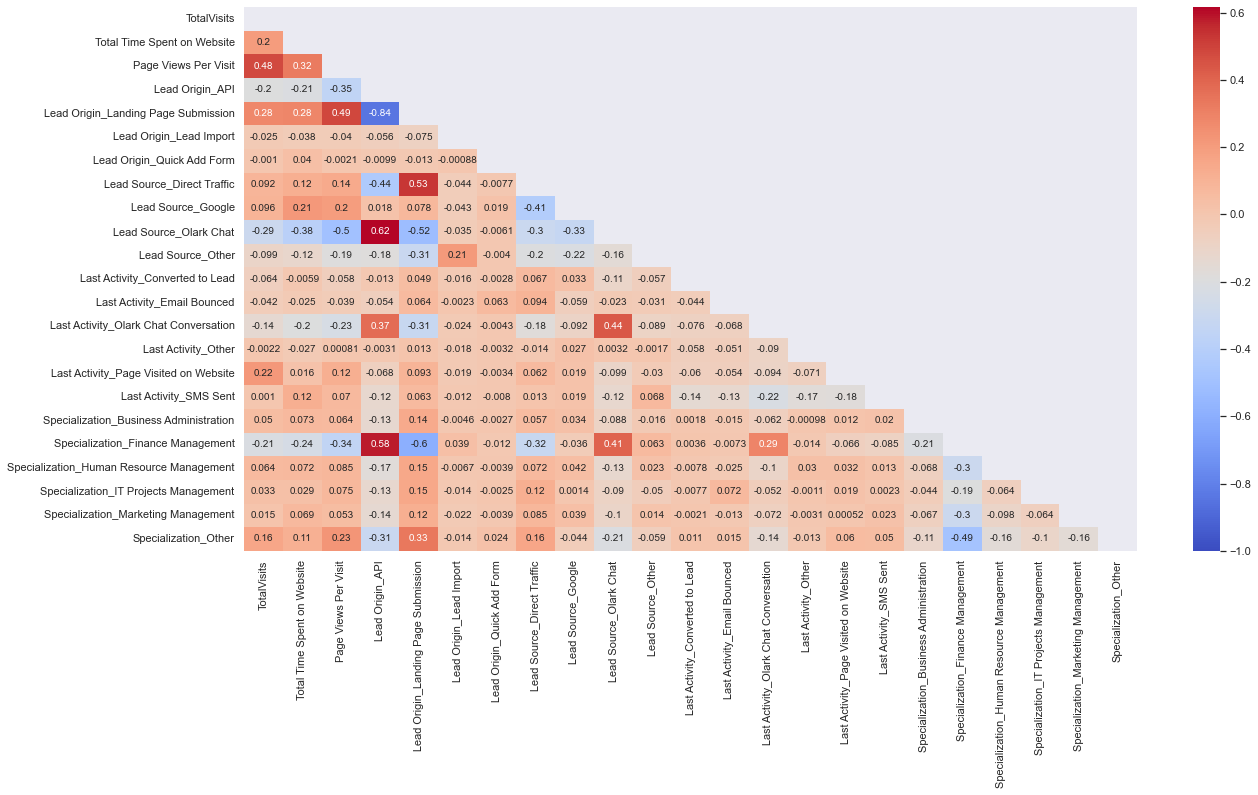

In [2291]:
# Let's see the correlation matrix 
plt.figure(figsize = (20, 10))
mask = np.zeros(X_train.corr().shape, dtype=bool)
mask[np.triu_indices(len(mask))] = True
sns.heatmap(X_train.corr(), annot = True, vmin=-1,cmap='coolwarm',mask=mask)
plt.show()

We can see few columns are highly correlated

We can check in RFE

**Feature Selection using RFE**

In [2292]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [2293]:
# Using rfe for features selection
logreg=LogisticRegression()



In [2294]:
# Running RFE with the output number of the variable equal to 18
rfe = RFE(estimator = logreg, n_features_to_select = 20, step = 18)            
rfe = rfe.fit(X_train, y_train)

In [2295]:
rfe.support_

array([ True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False,  True])

In [2296]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_API', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Origin_Quick Add Form', False, 2),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Other', True, 1),
 ('Last Activity_Converted to Lead', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Other', True, 1),
 ('Last Activity_Page Visited on Website', True, 1),
 ('Last Activity_SMS Sent', True, 1),
 ('Specialization_Business Administration', True, 1),
 ('Specialization_Finance Management', True, 1),
 ('Specialization_Human Resource Management', True, 1),
 ('Specialization_IT Projects Management', False, 2),
 ('Specialization_Marketing Management', False, 2),
 ('Specialization_Other', True, 1)]

In [2297]:
# After used RFE here RFE selected these variables should be used for modeling
col = X_train.columns[rfe.support_]
col

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_API', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Import', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Olark Chat', 'Lead Source_Other',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Specialization_Business Administration',
       'Specialization_Finance Management',
       'Specialization_Human Resource Management', 'Specialization_Other'],
      dtype='object')

In [2298]:
# After used RFE here RFE selected these variables should not be used for modeling
X_train.columns[~rfe.support_]

Index(['Lead Origin_Quick Add Form', 'Specialization_IT Projects Management',
       'Specialization_Marketing Management'],
      dtype='object')

# 5.Model Building

Assessing model with stats model

**Model 1:**

In [2299]:
import statsmodels.api as sm

In [2300]:
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2906.3
Date:                Mon, 27 Feb 2023   Deviance:                       5812.7
Time:                        10:40:05   Pearson chi2:                 6.69e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3499
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                        3.1558      0.319      9.901      0.000       2.531       3.781
TotalVisits                                  0.1858      0.056      3.316      0.001       0.076       0.296
Total Time Spent on Website                  1.1059      0.038     28.764      0.000       1.031       1.181
Page Views Per Visit                        -0.1511      0.051     -2.938      0.003      -0.252      -0.050
Lead Origin_API                             -3.7302      0.301    -12.395      0.000      -4.320      -3.140
Lead Origin_Landing Page Submission         -4.0368      0.310    -13.019      0.000      -4.645      -3.429
Lead Origin_Lead Import                     -3.7940      0.500     -7.594      0.000      -4.773      -2.815
Lead Source_Direct Traffic                  -0.2438      0.119     -2.046      0.041      -0.477      -0.010
Lead Source_Google                           0.1157      0.110      1.056      0.291      -0.099       0.330
Lead Source_Olark Chat                       1.0167      0.158      6.434      0.000       0.707       1.326
Lead Source_Other                            0.0735      0.259      0.283      0.777      -0.435       0.582
Last Activity_Converted to Lead             -1.0793      0.200     -5.396      0.000      -1.471      -0.687
Last Activity_Email Bounced                 -1.8659      0.280     -6.658      0.000      -2.415      -1.317
Last Activity_Olark Chat Conversation       -1.7821      0.168    -10.610      0.000      -2.111      -1.453
Last Activity_Other                         -0.2684      0.137     -1.963      0.050      -0.536      -0.000
Last Activity_Page Visited on Website       -0.7414      0.148     -5.023      0.000      -1.031      -0.452
Last Activity_SMS Sent                       1.0878      0.075     14.536      0.000       0.941       1.234
Specialization_Business Administration      -0.2308      0.165     -1.397      0.163      -0.555       0.093
Specialization_Finance Management           -0.5756      0.102     -5.618      0.000      -0.776      -0.375
Specialization_Human Resource Management    -0.1508      0.129     -1.171      0.241      -0.403       0.102
Specialization_Other                        -0.1518      0.103     -1.481      0.139      -0.353       0.049
============================================================================================================
"""

We can see that Lead Source_Other has highest P value let us check VIF and get in to conclusion

**Let us calculate VIF**

In [2301]:
# function to calculate vif
def vifcalc(df):
    vif = pd.DataFrame()

    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [2302]:
# Calculate the VIFs for the new model
vifcalc(X_train[col])

,Features,VIF
4,Lead Origin_Landing Page Submission,8.43
3,Lead Origin_API,7.07
17,Specialization_Finance Management,4.45
8,Lead Source_Olark Chat,4.42
6,Lead Source_Direct Traffic,3.65
7,Lead Source_Google,3.44
19,Specialization_Other,2.09
2,Page Views Per Visit,2.00
15,Last Activity_SMS Sent,1.73
9,Lead Source_Other,1.57


In [2303]:
col=col.drop('Lead Source_Other',1)

We have seen that Lead Source_Other has highest p value so lets drop it and check

**Model 2:**

In [2304]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm2.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2906.4
Date:                Mon, 27 Feb 2023   Deviance:                       5812.8
Time:                        10:40:14   Pearson chi2:                 6.69e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3499
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                        3.2264      0.199     16.195      0.000       2.836       3.617
TotalVisits                                  0.1862      0.056      3.335      0.001       0.077       0.296
Total Time Spent on Website                  1.1057      0.038     28.766      0.000       1.030       1.181
Page Views Per Visit                        -0.1514      0.051     -2.944      0.003      -0.252      -0.051
Lead Origin_API                             -3.7900      0.216    -17.574      0.000      -4.213      -3.367
Lead Origin_Landing Page Submission         -4.0985      0.222    -18.484      0.000      -4.533      -3.664
Lead Origin_Lead Import                     -3.7921      0.499     -7.593      0.000      -4.771      -2.813
Lead Source_Direct Traffic                  -0.2519      0.116     -2.179      0.029      -0.478      -0.025
Lead Source_Google                           0.1063      0.104      1.018      0.308      -0.098       0.311
Lead Source_Olark Chat                       1.0059      0.153      6.562      0.000       0.705       1.306
Last Activity_Converted to Lead             -1.0800      0.200     -5.401      0.000      -1.472      -0.688
Last Activity_Email Bounced                 -1.8684      0.280     -6.664      0.000      -2.418      -1.319
Last Activity_Olark Chat Conversation       -1.7819      0.168    -10.609      0.000      -2.111      -1.453
Last Activity_Other                         -0.2674      0.137     -1.956      0.051      -0.535       0.001
Last Activity_Page Visited on Website       -0.7408      0.148     -5.020      0.000      -1.030      -0.452
Last Activity_SMS Sent                       1.0865      0.075     14.544      0.000       0.940       1.233
Specialization_Business Administration      -0.2311      0.165     -1.398      0.162      -0.555       0.093
Specialization_Finance Management           -0.5756      0.102     -5.618      0.000      -0.776      -0.375
Specialization_Human Resource Management    -0.1509      0.129     -1.172      0.241      -0.403       0.102
Specialization_Other                        -0.1529      0.102     -1.493      0.135      -0.354       0.048
============================================================================================================
"""

In [2305]:
# Calculate the VIFs for the new model
vifcalc(X_train[col])

,Features,VIF
4,Lead Origin_Landing Page Submission,8.38
3,Lead Origin_API,6.92
8,Lead Source_Olark Chat,4.18
16,Specialization_Finance Management,3.72
6,Lead Source_Direct Traffic,3.56
7,Lead Source_Google,3.33
2,Page Views Per Visit,1.94
18,Specialization_Other,1.92
14,Last Activity_SMS Sent,1.65
11,Last Activity_Olark Chat Conversation,1.55


We can see that Lead Source_Google has high P value hence let us drop it

In [2306]:
col=col.drop('Lead Source_Google',1)

**Model 3**

In [2307]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm3.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2906.9
Date:                Mon, 27 Feb 2023   Deviance:                       5813.8
Time:                        10:40:18   Pearson chi2:                 6.69e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3498
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                        3.2261      0.199     16.188      0.000       2.836       3.617
TotalVisits                                  0.1810      0.055      3.291      0.001       0.073       0.289
Total Time Spent on Website                  1.1068      0.038     28.811      0.000       1.032       1.182
Page Views Per Visit                        -0.1596      0.051     -3.138      0.002      -0.259      -0.060
Lead Origin_API                             -3.7103      0.201    -18.482      0.000      -4.104      -3.317
Lead Origin_Landing Page Submission         -4.0116      0.204    -19.619      0.000      -4.412      -3.611
Lead Origin_Lead Import                     -3.7898      0.499     -7.588      0.000      -4.769      -2.811
Lead Source_Direct Traffic                  -0.3305      0.086     -3.842      0.000      -0.499      -0.162
Lead Source_Olark Chat                       0.9204      0.128      7.189      0.000       0.669       1.171
Last Activity_Converted to Lead             -1.0903      0.200     -5.460      0.000      -1.482      -0.699
Last Activity_Email Bounced                 -1.8738      0.280     -6.699      0.000      -2.422      -1.326
Last Activity_Olark Chat Conversation       -1.7813      0.168    -10.607      0.000      -2.110      -1.452
Last Activity_Other                         -0.2670      0.137     -1.952      0.051      -0.535       0.001
Last Activity_Page Visited on Website       -0.7386      0.147     -5.011      0.000      -1.027      -0.450
Last Activity_SMS Sent                       1.0854      0.075     14.532      0.000       0.939       1.232
Specialization_Business Administration      -0.2319      0.165     -1.403      0.161      -0.556       0.092
Specialization_Finance Management           -0.5798      0.102     -5.662      0.000      -0.780      -0.379
Specialization_Human Resource Management    -0.1506      0.129     -1.170      0.242      -0.403       0.102
Specialization_Other                        -0.1650      0.102     -1.622      0.105      -0.364       0.034
============================================================================================================
"""

In [2308]:
# Calculate the VIFs for the new model
vifcalc(X_train[col])

,Features,VIF
4,Lead Origin_Landing Page Submission,4.83
3,Lead Origin_API,4.70
15,Specialization_Finance Management,3.72
7,Lead Source_Olark Chat,2.89
6,Lead Source_Direct Traffic,2.02
17,Specialization_Other,1.90
2,Page Views Per Visit,1.87
13,Last Activity_SMS Sent,1.65
10,Last Activity_Olark Chat Conversation,1.55
0,TotalVisits,1.37


We can see  Pvalue is more than 0.05

We can also see that Specialization_Human Resource Management has more  pvalue so lets drop it

In [2309]:
col=col.drop('Specialization_Human Resource Management',1)

**Model 4**

In [2310]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm4.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2907.6
Date:                Mon, 27 Feb 2023   Deviance:                       5815.2
Time:                        10:40:24   Pearson chi2:                 6.70e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3497
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                      3.1695      0.193     16.401      0.000       2.791       3.548
TotalVisits                                0.1792      0.055      3.265      0.001       0.072       0.287
Total Time Spent on Website                1.1058      0.038     28.807      0.000       1.031       1.181
Page Views Per Visit                      -0.1601      0.051     -3.147      0.002      -0.260      -0.060
Lead Origin_API                           -3.7028      0.201    -18.458      0.000      -4.096      -3.310
Lead Origin_Landing Page Submission       -4.0053      0.204    -19.595      0.000      -4.406      -3.605
Lead Origin_Lead Import                   -3.7913      0.500     -7.589      0.000      -4.771      -2.812
Lead Source_Direct Traffic                -0.3279      0.086     -3.814      0.000      -0.496      -0.159
Lead Source_Olark Chat                     0.9179      0.128      7.172      0.000       0.667       1.169
Last Activity_Converted to Lead           -1.0907      0.200     -5.464      0.000      -1.482      -0.699
Last Activity_Email Bounced               -1.8659      0.280     -6.673      0.000      -2.414      -1.318
Last Activity_Olark Chat Conversation     -1.7775      0.168    -10.590      0.000      -2.106      -1.449
Last Activity_Other                       -0.2678      0.137     -1.960      0.050      -0.536    4.32e-05
Last Activity_Page Visited on Website     -0.7417      0.147     -5.032      0.000      -1.031      -0.453
Last Activity_SMS Sent                     1.0868      0.075     14.553      0.000       0.940       1.233
Specialization_Business Administration    -0.1816      0.160     -1.138      0.255      -0.494       0.131
Specialization_Finance Management         -0.5306      0.093     -5.679      0.000      -0.714      -0.347
Specialization_Other                      -0.1149      0.092     -1.244      0.214      -0.296       0.066
==========================================================================================================
"""

In [2311]:
# Calculate the VIFs for the new model
vifcalc(X_train[col])

,Features,VIF
3,Lead Origin_API,4.39
4,Lead Origin_Landing Page Submission,4.20
15,Specialization_Finance Management,3.32
7,Lead Source_Olark Chat,2.88
6,Lead Source_Direct Traffic,2.02
2,Page Views Per Visit,1.87
16,Specialization_Other,1.67
13,Last Activity_SMS Sent,1.64
10,Last Activity_Olark Chat Conversation,1.55
0,TotalVisits,1.36


We can see that Specialization_Other has insignificant value and pvalue is more than 0.05 so we can drop it

In [2312]:
col=col.drop('Specialization_Other',1)

**Model 5**

In [2313]:
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm5.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2908.4
Date:                Mon, 27 Feb 2023   Deviance:                       5816.7
Time:                        10:40:33   Pearson chi2:                 6.69e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3495
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                      3.1220      0.189     16.497      0.000       2.751       3.493
TotalVisits                                0.1764      0.054      3.238      0.001       0.070       0.283
Total Time Spent on Website                1.1064      0.038     28.824      0.000       1.031       1.182
Page Views Per Visit                      -0.1634      0.051     -3.214      0.001      -0.263      -0.064
Lead Origin_API                           -3.6980      0.200    -18.445      0.000      -4.091      -3.305
Lead Origin_Landing Page Submission       -4.0048      0.204    -19.598      0.000      -4.405      -3.604
Lead Origin_Lead Import                   -3.7976      0.500     -7.595      0.000      -4.778      -2.818
Lead Source_Direct Traffic                -0.3272      0.086     -3.806      0.000      -0.496      -0.159
Lead Source_Olark Chat                     0.9123      0.128      7.134      0.000       0.662       1.163
Last Activity_Converted to Lead           -1.0981      0.200     -5.503      0.000      -1.489      -0.707
Last Activity_Email Bounced               -1.8697      0.280     -6.682      0.000      -2.418      -1.321
Last Activity_Olark Chat Conversation     -1.7799      0.168    -10.605      0.000      -2.109      -1.451
Last Activity_Other                       -0.2650      0.137     -1.940      0.052      -0.533       0.003
Last Activity_Page Visited on Website     -0.7461      0.147     -5.063      0.000      -1.035      -0.457
Last Activity_SMS Sent                     1.0837      0.075     14.524      0.000       0.937       1.230
Specialization_Business Administration    -0.1315      0.154     -0.852      0.394      -0.434       0.171
Specialization_Finance Management         -0.4845      0.086     -5.648      0.000      -0.653      -0.316
==========================================================================================================
"""

In [2314]:
# Calculate the VIFs for the new model
vifcalc(X_train[col])

,Features,VIF
3,Lead Origin_API,4.11
4,Lead Origin_Landing Page Submission,3.51
15,Specialization_Finance Management,2.91
7,Lead Source_Olark Chat,2.88
6,Lead Source_Direct Traffic,2.02
2,Page Views Per Visit,1.87
13,Last Activity_SMS Sent,1.62
10,Last Activity_Olark Chat Conversation,1.55
0,TotalVisits,1.36
1,Total Time Spent on Website,1.26


We can see that Specialization_Business Administration has insignificant value so we can drop it

In [2315]:
col=col.drop('Specialization_Business Administration',1)

**Model 6:**

In [2316]:
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm6.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2908.7
Date:                Mon, 27 Feb 2023   Deviance:                       5817.5
Time:                        10:40:41   Pearson chi2:                 6.68e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3494
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     3.1107      0.189     16.480      0.000       2.741       3.481
TotalVisits                               0.1758      0.054      3.236      0.001       0.069       0.282
Total Time Spent on Website               1.1057      0.038     28.815      0.000       1.030       1.181
Page Views Per Visit                     -0.1627      0.051     -3.201      0.001      -0.262      -0.063
Lead Origin_API                          -3.6965      0.200    -18.439      0.000      -4.089      -3.304
Lead Origin_Landing Page Submission      -4.0058      0.204    -19.604      0.000      -4.406      -3.605
Lead Origin_Lead Import                  -3.7977      0.500     -7.600      0.000      -4.777      -2.818
Lead Source_Direct Traffic               -0.3262      0.086     -3.795      0.000      -0.495      -0.158
Lead Source_Olark Chat                    0.9115      0.128      7.128      0.000       0.661       1.162
Last Activity_Converted to Lead          -1.0979      0.199     -5.505      0.000      -1.489      -0.707
Last Activity_Email Bounced              -1.8666      0.280     -6.673      0.000      -2.415      -1.318
Last Activity_Olark Chat Conversation    -1.7798      0.168    -10.604      0.000      -2.109      -1.451
Last Activity_Other                      -0.2634      0.137     -1.928      0.054      -0.531       0.004
Last Activity_Page Visited on Website    -0.7477      0.147     -5.071      0.000      -1.037      -0.459
Last Activity_SMS Sent                    1.0840      0.075     14.530      0.000       0.938       1.230
Specialization_Finance Management        -0.4741      0.085     -5.583      0.000      -0.641      -0.308
=========================================================================================================
"""

In [2317]:
# Calculate the VIFs for the new model
vifcalc(X_train[col])

,Features,VIF
3,Lead Origin_API,4.08
4,Lead Origin_Landing Page Submission,3.40
7,Lead Source_Olark Chat,2.88
14,Specialization_Finance Management,2.86
6,Lead Source_Direct Traffic,2.02
2,Page Views Per Visit,1.86
13,Last Activity_SMS Sent,1.62
10,Last Activity_Olark Chat Conversation,1.55
0,TotalVisits,1.36
1,Total Time Spent on Website,1.26


We can see slight increase in pvalue in Last Activity_Other  column so we can drop it

In [2318]:
col=col.drop('Last Activity_Other',1)

**Model 7:**

In [2319]:
X_train_sm = sm.add_constant(X_train[col])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm7.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2910.6
Date:                Mon, 27 Feb 2023   Deviance:                       5821.3
Time:                        10:40:50   Pearson chi2:                 6.68e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3491
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     3.0799      0.188     16.389      0.000       2.712       3.448
TotalVisits                               0.1761      0.054      3.242      0.001       0.070       0.283
Total Time Spent on Website               1.1072      0.038     28.864      0.000       1.032       1.182
Page Views Per Visit                     -0.1610      0.051     -3.173      0.002      -0.260      -0.062
Lead Origin_API                          -3.7029      0.200    -18.479      0.000      -4.096      -3.310
Lead Origin_Landing Page Submission      -4.0140      0.204    -19.654      0.000      -4.414      -3.614
Lead Origin_Lead Import                  -3.7779      0.500     -7.551      0.000      -4.758      -2.797
Lead Source_Direct Traffic               -0.3220      0.086     -3.749      0.000      -0.490      -0.154
Lead Source_Olark Chat                    0.9115      0.128      7.133      0.000       0.661       1.162
Last Activity_Converted to Lead          -1.0621      0.199     -5.346      0.000      -1.451      -0.673
Last Activity_Email Bounced              -1.8314      0.279     -6.558      0.000      -2.379      -1.284
Last Activity_Olark Chat Conversation    -1.7424      0.167    -10.445      0.000      -2.069      -1.415
Last Activity_Page Visited on Website    -0.7127      0.146     -4.868      0.000      -1.000      -0.426
Last Activity_SMS Sent                    1.1198      0.072     15.461      0.000       0.978       1.262
Specialization_Finance Management        -0.4729      0.085     -5.572      0.000      -0.639      -0.307
=========================================================================================================
"""

In [2320]:
# Calculate the VIFs for the new model
vifcalc(X_train[col])

,Features,VIF
3,Lead Origin_API,3.96
4,Lead Origin_Landing Page Submission,3.18
7,Lead Source_Olark Chat,2.88
13,Specialization_Finance Management,2.86
6,Lead Source_Direct Traffic,2.02
2,Page Views Per Visit,1.86
12,Last Activity_SMS Sent,1.54
10,Last Activity_Olark Chat Conversation,1.51
0,TotalVisits,1.36
1,Total Time Spent on Website,1.26


We can see Vif value less than 5 and all have pvalues under 0.05

Hence we can consider Model 7 as our final model

In [2321]:
# Prediciting values on ytrain
y_train_pred = result.predict(X_train_sm).values.reshape(-1)


In [2322]:
y_train_pred[:10]

array([0.14610208, 0.0546061 , 0.06186944, 0.15244245, 0.03685711,
       0.06301877, 0.20170956, 0.5312826 , 0.0546061 , 0.45129016])

In [2323]:
y_train_pred_final = pd.DataFrame({'Converted':y_train['Converted'], 'Converted_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.reset_index(drop=True, inplace=True)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number
0,0,0.146102,609431
1,0,0.054606,631817
2,0,0.061869,596164
3,0,0.152442,646570
4,0,0.036857,643974


In [2324]:
#  let's take 0.5 as Cutoff
y_train_pred_final['Converted_pred']=y_train_pred_final['Converted_Prob'].apply(lambda x : 1 if x>0.5 else 0)

In [2325]:
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,Converted_pred
0,0,0.146102,609431,0
1,0,0.054606,631817,0
2,0,0.061869,596164,0
3,0,0.152442,646570,0
4,0,0.036857,643974,0


**Making Confusion matrix**

In [2326]:
from sklearn import metrics

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Converted_pred )
confusion

array([[3494,  508],
       [ 795, 1671]], dtype=int64)

In [2327]:
# Finding the metrics like accuracy, sensitivity and specicity 
def metrices_(converted,predicted):
    cm1 = metrics.confusion_matrix(converted,predicted)
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    return accuracy,sensi,speci

In [2328]:
acc,sensi,speci=metrices_(y_train_pred_final.Converted,y_train_pred_final.Converted_pred)

print('Accuracy: {}, Sensitivity {}, specitiy {}'.format(acc,sensi,speci))

Accuracy: 0.7985466914038343, Sensitivity 0.6776155717761557, specitiy 0.8730634682658671


Here we got Low Sensitivity when we are randomly taking cut off as 0.5

In [2329]:
# Finding the TP, TN, FP, FN
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negative

In [2330]:
# Calculate false postive rate -
print(FP/ float(TN+FP))

0.12693653173413294


In [2331]:
# positive predictive value 
print (TP / float(TP+FP))

0.7668655346489215


In [2332]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8146421077174166


We found out that our specificity was good (~87%) but our sensitivity was only 67%. Hence, this needed to be taken care of.
We have got sensitivity of 67% and this was mainly because of the cut-off point of 0.5 that we had arbitrarily chosen. Now, this cut-off point had to be optimised in order to get a decent value of sensitivity and for this we will use the ROC curve.

**Plotting ROC curve**

In [2333]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
#     plt.savefig('Roc.png',dpi=300,transparent=True)
    plt.show()
    

    return None

In [2334]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

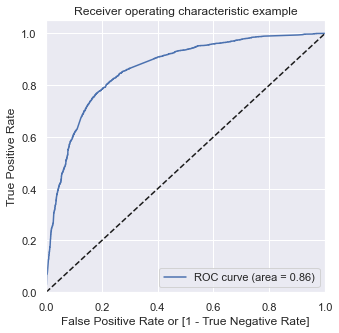

In [2335]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

We have ROC curve area as 0.86 hence our model is considered as good

**Finding the Optimal cut point**

Above we had chosen an arbitrary cut-off value of 0.5. We need to determine the best cut-off value and the below section deals with that. Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [2336]:
# Let's create columns with different probability cutoffs 

# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,Converted_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.146102,609431,0,1,1,0,0,0,0,0,0,0,0
1,0,0.054606,631817,0,1,0,0,0,0,0,0,0,0,0
2,0,0.061869,596164,0,1,0,0,0,0,0,0,0,0,0
3,0,0.152442,646570,0,1,1,0,0,0,0,0,0,0,0
4,0,0.036857,643974,0,1,0,0,0,0,0,0,0,0,0


In [2337]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.570965  0.972425  0.323588
0.2   0.2  0.698052  0.920114  0.561219
0.3   0.3  0.779685  0.833333  0.746627
0.4   0.4  0.801020  0.754663  0.829585
0.5   0.5  0.798547  0.677616  0.873063
0.6   0.6  0.783395  0.566504  0.917041
0.7   0.7  0.757421  0.454988  0.943778
0.8   0.8  0.733302  0.359692  0.963518
0.9   0.9  0.675634  0.170316  0.987006


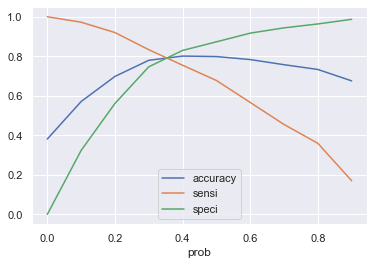

In [2338]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
# plotting accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()



From the above figure we can take 0.35  as cut off

In [2339]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,Converted_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.146102,609431,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.054606,631817,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.061869,596164,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.152442,646570,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.036857,643974,0,1,0,0,0,0,0,0,0,0,0,0


**Assigning lead score to final data**

In [2340]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_Prob.map( lambda x: round(x*100))
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,Converted_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.146102,609431,0,1,1,0,0,0,0,0,0,0,0,0,15
1,0,0.054606,631817,0,1,0,0,0,0,0,0,0,0,0,0,5
2,0,0.061869,596164,0,1,0,0,0,0,0,0,0,0,0,0,6
3,0,0.152442,646570,0,1,1,0,0,0,0,0,0,0,0,0,15
4,0,0.036857,643974,0,1,0,0,0,0,0,0,0,0,0,0,4


**Model Evaluation**

In [2341]:
# Let's check the overall accuracy.
print("Accuracy :",metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

Accuracy : 0.7906617192331478


In [2342]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [2343]:
# Confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3162,  840],
       [ 514, 1952]], dtype=int64)

In [2344]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.7915652879156528


In [2345]:
# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))

Specificity : 0.7901049475262368


In [2346]:
# Calculate false postive rate - predicting converted lead when the lead was actually not have converted
print("False Positive rate : ",FP/ float(TN+FP))

False Positive rate :  0.2098950524737631


In [2347]:
# Finding the Recall Score
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7915652879156528

In [2348]:
# Positive predictive value 
print("Positive Predictive Value :",TP / float(TP+FP))

Positive Predictive Value : 0.6991404011461319


In [2349]:
# Negative predictive value
print("Negative Predictive Value : ",TN / float(TN+ FN))

Negative Predictive Value :  0.8601741022850925


**Precision and Recall**

Precision = Also known as Positive Predictive Value, it refers to the percentage of the results which are relevant.


Recall = Also known as Sensitivity , it refers to the percentage of total relevant results correctly classified by the algorithm.

In [2350]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion

array([[3162,  840],
       [ 514, 1952]], dtype=int64)

In [2351]:
# Precision
TP / TP + FP

print("Precision : ",confusion[1,1]/(confusion[0,1]+confusion[1,1]))

Precision :  0.6991404011461319


In [2352]:
# Recall
TP / TP + FN

print("Recall :",confusion[1,1]/(confusion[1,0]+confusion[1,1]))

Recall : 0.7915652879156528


**Precision and Recall trade off**

In [2376]:
from sklearn.metrics import precision_recall_curve

y_train_pred_final.Converted, y_train_pred_final.final_predicted

(0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6463    0
 6464    0
 6465    0
 6466    0
 6467    0
 Name: Converted, Length: 6468, dtype: int64,
 0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6463    0
 6464    0
 6465    0
 6466    0
 6467    0
 Name: final_predicted, Length: 6468, dtype: int64)

In [2354]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

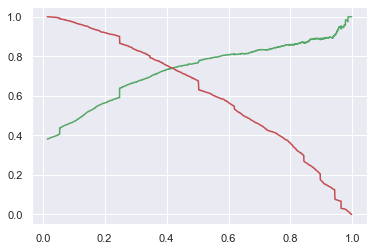

In [2355]:
# plotting a trade-off curve between precision and recall
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

**The above graph shows the trade-off between the Precision and Recall .**

# **Making Predictions on the test set**

In [2356]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits',
                                                                                                        'Total Time Spent on Website',
                                                                                                        'Page Views Per Visit']])

In [2357]:
# Assigning the columns selected by the final model to the X_test 
X_test = X_test[col]
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Olark Chat,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Finance Management
Lead Number,,,,,,,,,,,,,,
639211,-0.662572,-0.886868,-1.080745,0,0,0,0,0,0,0,0,0,0,0
590711,0.109106,1.875759,-0.164934,0,1,0,1,0,0,0,0,0,1,0
644174,-0.083813,0.995321,-0.393887,0,1,0,1,0,0,0,0,0,0,0
641392,-0.276733,-0.544986,-0.164934,0,1,0,0,0,0,0,0,0,1,1
587955,1.845382,2.283811,0.407448,1,0,0,0,0,0,0,0,0,0,1


In [2358]:
# Adding a const
X_test_sm = sm.add_constant(X_test)

# Making predictions on the test set
y_test_pred = result.predict(X_test_sm)
y_test_pred[:10]

Lead Number
639211    0.896162
590711    0.879360
644174    0.473688
641392    0.286428
587955    0.844511
593130    0.182313
648319    0.054606
636722    0.942576
648231    0.813551
637858    0.211898
dtype: float64

In [2359]:
# Converting y_test_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [2360]:
# Let's see the head
y_pred_1.head()

,0
Lead Number,
639211,0.896162
590711,0.879360
644174,0.473688
641392,0.286428
587955,0.844511


In [2361]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [2362]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

In [2363]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [2364]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [2365]:
y_pred_final.head()

,Converted,Prospect ID,0
0,1,639211,0.896162
1,1,590711,0.879360
2,1,644174,0.473688
3,0,641392,0.286428
4,1,587955,0.844511


In [2366]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [2367]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(columns=['Prospect ID','Converted','Converted_prob'])

In [2368]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob
0,639211,1,0.896162
1,590711,1,0.879360
2,644174,1,0.473688
3,641392,0,0.286428
4,587955,1,0.844511


In [2369]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.35 else 0)

In [2370]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted
0,639211,1,0.896162,1
1,590711,1,0.879360,1
2,644174,1,0.473688,1
3,641392,0,0.286428,0
4,587955,1,0.844511,1


In [2371]:
## Let's check the overall accuracy.
print("Accuracy :",metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted))

Accuracy : 0.7839105339105339


In [2372]:
# Making the confusion matrix
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1314,  363],
       [ 236,  859]], dtype=int64)

In [2373]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [2374]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity :",TP / float(TP+FN))

Sensitivity : 0.7844748858447489


In [2375]:
# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))

Specificity : 0.7835420393559929


**Observations:**
After running the model on the Train and test Data , we obtain:

**Train Data:**


Accuracy : 79.06%

Sensitivity : 79.15%

Specificity : 79.0%


**Test Data:**

Accuracy : 78.39%

Sensitivity : 78.44%

Specificity : 78.35%


**Thus we have achieved our goal of getting a ballpark of the target lead conversion rate to be almost around 80% . The Model seems to predict the Conversion Rate very well and we should be able to give the CEO confidence in making good calls based on this model to get a higher lead conversion rate of 80%.**

# Assigning lead score to test data

In [2377]:
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
0,639211,1,0.896162,1,90
1,590711,1,0.879360,1,88
2,644174,1,0.473688,1,47
3,641392,0,0.286428,0,29
4,587955,1,0.844511,1,84


# Finding Out the leads which should be contacted

The customers which should be contacted are the customers whose "Lead Score" is equal to or greater than 85. They can be termed as 'Hot Leads'.

In [2378]:
hot_leads=y_pred_final.loc[y_pred_final["Lead_Score"]>=85]
hot_leads

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
0,639211,1,0.896162,1,90
1,590711,1,0.879360,1,88
7,636722,1,0.942576,1,94
34,596412,1,0.994794,1,99
35,591418,1,0.942792,1,94
...,...,...,...,...,...
2740,609349,1,0.859185,1,86
2743,648386,1,0.884495,1,88
2754,587973,0,0.989585,1,99
2756,592625,1,0.957841,1,96


 So there are 336 leads which can be contacted and have a high chance of getting converted. The Prospect ID of the customers to be contacted are :

In [2379]:
print("The Prospect ID of the customers which should be contacted are :")

hot_leads_ids = hot_leads["Prospect ID"].values.reshape(-1)
hot_leads_ids

The Prospect ID of the customers which should be contacted are :


array([639211, 590711, 636722, 596412, 591418, 658831, 603687, 606393,
       589146, 595141, 607640, 637759, 605291, 595945, 636860, 587968,
       609128, 599452, 628689, 617043, 650311, 594978, 588051, 608143,
       587384, 628508, 654001, 653691, 624042, 630779, 626945, 627560,
       640928, 595524, 649493, 645398, 607532, 616023, 600201, 588618,
       640081, 614498, 630200, 605303, 633956, 636059, 591536, 601448,
       637070, 656880, 598055, 645825, 629491, 619170, 637500, 658264,
       639311, 620179, 603490, 609739, 614573, 590527, 627497, 627744,
       619408, 622280, 659607, 631758, 630875, 614091, 612679, 633926,
       630736, 604499, 620792, 609185, 627248, 639298, 611930, 626799,
       588682, 631318, 636659, 587348, 644222, 642987, 589512, 588007,
       607089, 605230, 606663, 658648, 584186, 650511, 626970, 607984,
       593872, 645370, 634844, 637640, 590742, 616944, 646253, 586771,
       640120, 588111, 659191, 606306, 606573, 623427, 590107, 612618,
      

**Finding out the Important Features from our final model:**

In [2380]:
result.params.sort_values(ascending=False)

const                                    3.079940
Last Activity_SMS Sent                   1.119768
Total Time Spent on Website              1.107230
Lead Source_Olark Chat                   0.911487
TotalVisits                              0.176112
Page Views Per Visit                    -0.161004
Lead Source_Direct Traffic              -0.322002
Specialization_Finance Management       -0.472911
Last Activity_Page Visited on Website   -0.712700
Last Activity_Converted to Lead         -1.062051
Last Activity_Olark Chat Conversation   -1.742376
Last Activity_Email Bounced             -1.831376
Lead Origin_API                         -3.702946
Lead Origin_Lead Import                 -3.777850
Lead Origin_Landing Page Submission     -4.013988
dtype: float64

# Recommendations

1.The company should make calls to the leads who are the "const" as they are more likely to get converted.


2.The company should make calls to the leads whose last activity was SMS Sent as they are more likely to get converted.


3.The company should  make calls to the leads whose Lead source was "Olark Chat" as they are more likely to get converted.

4.The company should  make calls to the leads whose Total visits are more since they are more likely to get converted 

5.The company should not make calls to the leads whose page views per visit is more as they are more likely to not get converted

6.The company should not make calls to the leads whose source is direct traffic as they are more likely to not get converted

7.The company should not make calls to the leads whose Specialization was "Finance Management" as they are not likely to get converted.

8.The company should not make calls to the leads whose Last Activity was Page Visited on Website,Converted to Lead ,Olark Chat Conversation,Email Bounced as they are not likely to get converted.

9.The company should not make calls to the leads whose origin API,Lead Import,Landing Page Submission as they are not likely to get converted.